In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
chicago_crime1 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2001.csv', error_bad_lines =False, low_memory=False)


In [5]:
chicago_crime2 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2005.csv', error_bad_lines =False, low_memory=False)

In [6]:
chicago_crime3 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2008.csv', error_bad_lines =False, low_memory=False)

In [7]:
chicago_crime4 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2012.csv', error_bad_lines =False, low_memory=False)

In [8]:
chicago_crime =pd.concat([chicago_crime1, chicago_crime2,chicago_crime3,chicago_crime4])

In [9]:
chicago_crime.shape

(1887407, 23)

In [10]:
chicago_crime.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424.0,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935.0,9.0,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"


In [11]:
chicago_crime.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         1
Block                        1
IUCR                         1
Primary Type                 1
Description                  1
Location Description       478
Arrest                       2
Domestic                     2
Beat                         2
District                    44
Ward                    402191
Community Area          402601
FBI Code                     2
X Coordinate             31547
Y Coordinate             31547
Year                         3
Updated On                   3
Latitude                 31549
Longitude                31549
Location                 31549
dtype: int64

In [12]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887407 entries, 0 to 548600
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                object 
 10  Domestic              object 
 11  Beat                  float64
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: float

In [13]:
chicago_crime.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.887407e+06,1.887407e+06,1.887405e+06,1.887363e+06,1.485216e+06,1.484806e+06,1.855860e+06,1.855860e+06,1.887404e+06,1.855858e+06,1.855858e+06
mean,1.863695e+06,5.850047e+06,1.193685e+03,1.129817e+01,2.265705e+01,3.784834e+01,1.164482e+06,1.885631e+06,2.007543e+03,4.184177e+01,-8.767193e+01
std,1.299607e+06,2.677770e+06,7.032164e+02,6.943250e+00,1.376230e+01,2.159353e+01,1.763080e+04,3.334244e+04,4.229354e+00,9.177054e-02,6.366779e-02
min,0.000000e+00,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,8.779055e+05,4.774356e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152898e+06,1.859073e+06,2.006000e+03,4.176871e+01,-8.771396e+01
50%,1.349917e+06,6.267769e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165948e+06,1.890045e+06,2.008000e+03,4.185385e+01,-8.766628e+01
75%,2.811456e+06,8.552642e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909431e+06,2.012000e+03,4.190715e+01,-8.762844e+01
max,3.947277e+06,1.055040e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951610e+06,2.016000e+03,4.202288e+01,-8.752453e+01


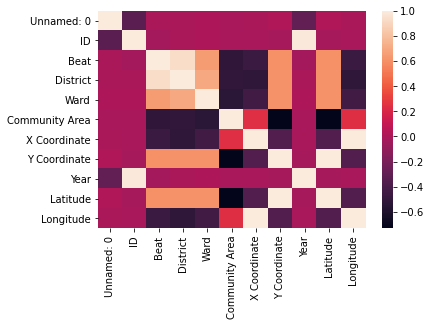

In [14]:
sns.heatmap(chicago_crime.corr())

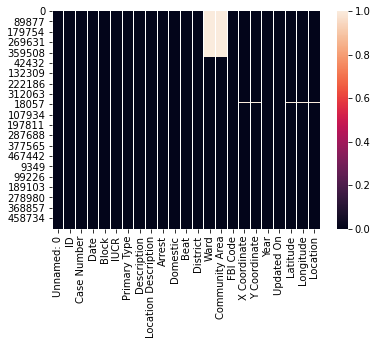

In [15]:
sns.heatmap(chicago_crime.isnull())

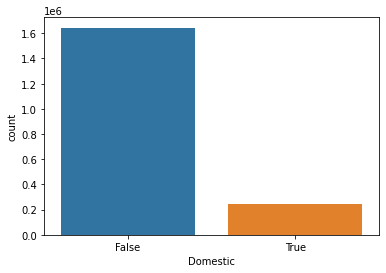

In [16]:
sns.countplot(x='Domestic', data=chicago_crime)

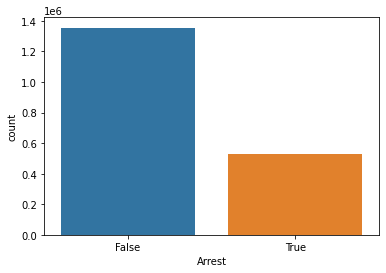

In [17]:
sns.countplot(x='Arrest', data=chicago_crime)

In [18]:
chicago_crime['Location Description'].nunique(dropna=True)

150

In [19]:
df=chicago_crime.drop(['Unnamed: 0','ID','FBI Code','IUCR','X Coordinate','Y Coordinate','Updated On','Case Number','District','Latitude','Longitude','Beat',
                      'Community Area','Ward','Year','Location'],axis=1)

In [20]:
df.tail(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
548591,06/19/2013 05:27:00 PM,028XX W 64TH ST,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False
548592,06/19/2013 01:30:00 PM,066XX S FAIRFIELD AVE,ASSAULT,AGGRAVATED: HANDGUN,SIDEWALK,False,False
548593,06/19/2013 01:35:00 PM,019XX E 75TH ST,CRIMINAL TRESPASS,TO LAND,SIDEWALK,False,False
548594,06/19/2013 06:00:00 PM,060XX S ELIZABETH ST,BATTERY,SIMPLE,SIDEWALK,True,False
548595,06/17/2013 08:00:00 AM,045XX W 56TH ST,ASSAULT,SIMPLE,RESIDENCE,False,True
548596,06/19/2013 11:45:00 AM,043XX W WABANSIA AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
548597,06/19/2013 03:31:00 PM,009XX N ST LOUIS AVE,BATTERY,SIMPLE,SIDEWALK,True,False
548598,06/19/2013 03:45:00 PM,015XX W MORSE AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False
548599,06/19/2013 05:00:00 PM,062XX N TALMAN AVE,CRIMINAL DAMAGE,TO PROPERTY,ALLEY,False,False
548600,06/19/2013 03:24:00 PM,011XX W GRANVILLE AVE,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False


## conversion of the date into a datetime format

In [21]:
df.Date =pd.to_datetime(df.Date, format ='%m/%d/%Y %I:%M:%S %p')

In [22]:
df.index =pd.DatetimeIndex(df.Date)

In [23]:
df['Date'].unique()

array(['2004-01-01T00:01:00.000000000', '2003-03-01T00:00:00.000000000',
       '2004-06-20T11:00:00.000000000', ...,
       '2013-06-19T18:00:00.000000000', '2013-06-19T15:31:00.000000000',
       '2013-06-19T15:24:00.000000000'], dtype='datetime64[ns]')

In [24]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [25]:
df.tail()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2013-06-19 11:45:00,2013-06-19 11:45:00,043XX W WABANSIA AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
2013-06-19 15:31:00,2013-06-19 15:31:00,009XX N ST LOUIS AVE,BATTERY,SIMPLE,SIDEWALK,True,False
2013-06-19 15:45:00,2013-06-19 15:45:00,015XX W MORSE AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False
2013-06-19 17:00:00,2013-06-19 17:00:00,062XX N TALMAN AVE,CRIMINAL DAMAGE,TO PROPERTY,ALLEY,False,False
2013-06-19 15:24:00,2013-06-19 15:24:00,011XX W GRANVILLE AVE,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False


In [26]:
df['Primary Type'].value_counts()

THEFT                                390098
BATTERY                              345016
CRIMINAL DAMAGE                      219727
NARCOTICS                            210678
ASSAULT                              115485
OTHER OFFENSE                        114405
BURGLARY                             109890
MOTOR VEHICLE THEFT                   89987
ROBBERY                               71492
DECEPTIVE PRACTICE                    66192
CRIMINAL TRESPASS                     53616
PROSTITUTION                          20712
WEAPONS VIOLATION                     18430
PUBLIC PEACE VIOLATION                14222
OFFENSE INVOLVING CHILDREN            11867
CRIM SEXUAL ASSAULT                    7084
SEX OFFENSE                            6851
LIQUOR LAW VIOLATION                   4477
GAMBLING                               4390
INTERFERENCE WITH PUBLIC OFFICER       3984
ARSON                                  3131
KIDNAPPING                             1920
HOMICIDE                        

In [27]:
df['Description'].value_counts()

SIMPLE                         239756
$500 AND UNDER                 155267
DOMESTIC BATTERY SIMPLE        127470
TO VEHICLE                     106032
TO PROPERTY                    101023
                                ...  
REGISTER FED GAMBLING STAMP         1
BOLITA OR BOLI PUL/RUNNER           1
ADULTRY                             1
DOMESTIC VIOLENCE                   1
LOTTERY/OTHER                       1
Name: Description, Length: 363, dtype: int64

## finding the top 10 crimes that was comitted

In [28]:
df['Primary Type'].value_counts().iloc[:10]

THEFT                  390098
BATTERY                345016
CRIMINAL DAMAGE        219727
NARCOTICS              210678
ASSAULT                115485
OTHER OFFENSE          114405
BURGLARY               109890
MOTOR VEHICLE THEFT     89987
ROBBERY                 71492
DECEPTIVE PRACTICE      66192
Name: Primary Type, dtype: int64

In [29]:
order_num =df['Primary Type'].value_counts().iloc[:10].index

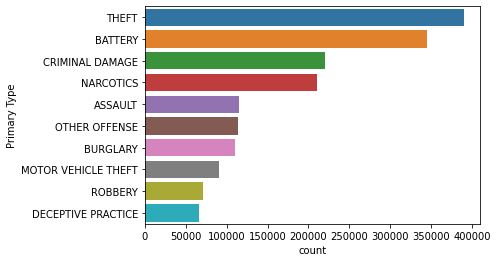

In [30]:
sns.countplot(y='Primary Type', data=df, order=order_num)

## finding how many of the crimes are street base,(location)

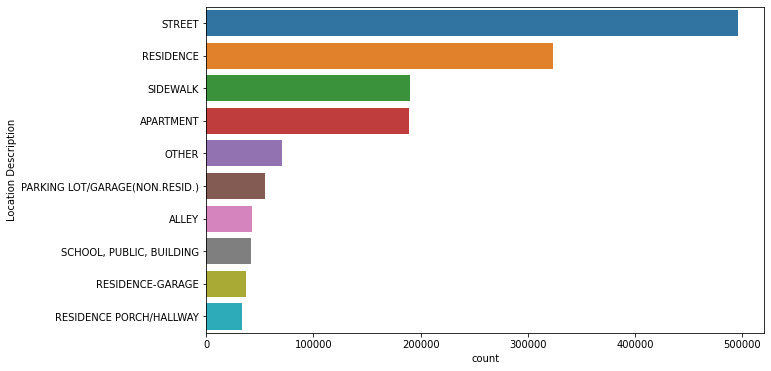

In [31]:
order_num2 =df['Location Description'].value_counts().iloc[:10].index
plt.figure(figsize=(10,6))
sns.countplot(y='Location Description', data=df, order =order_num2)

## finding the number of specific crime that occured in a specific month

In [32]:
df.resample('Y').size()

Date
2001-12-31    400118
2002-12-31      4648
2003-12-31       979
2004-12-31      1207
2005-12-31      1951
2006-12-31    338523
2007-12-31     43409
2008-12-31    425748
2009-12-31    120194
2010-12-31      1493
2011-12-31       535
2012-12-31    333989
2013-12-31    139967
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
dtype: int64

Text(0, 0.5, 'Number of Crimes in a year')

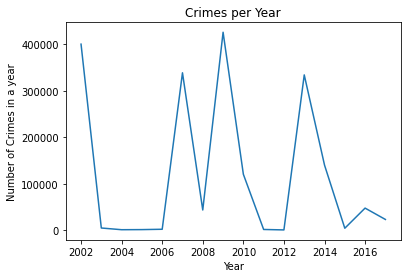

In [33]:
plt.plot(df.resample('Y').size())
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes in a year')

In [34]:
df.resample('M').size()

Date
2001-01-31    37528
2001-02-28    33560
2001-03-31    40295
2001-04-30    39769
2001-05-31    41490
              ...  
2016-01-31      809
2016-02-29      123
2016-03-31      213
2016-04-30     1663
2016-05-31    20232
Length: 185, dtype: int64

Text(0, 0.5, 'Number of Crimes in a month')

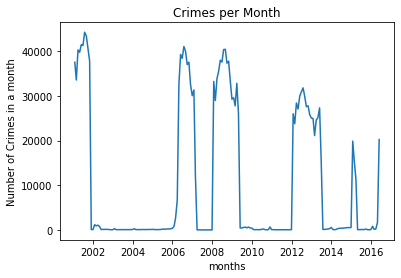

In [35]:
plt.plot(df.resample('M').size())
plt.title('Crimes per Month')
plt.xlabel('months')
plt.ylabel('Number of Crimes in a month')

Text(0, 0.5, 'Number of Crimes in a day')

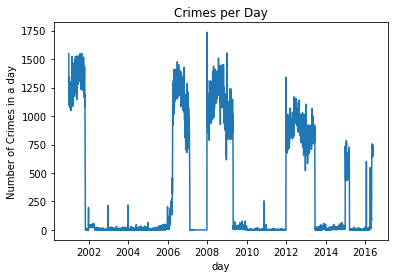

In [36]:
plt.plot(df.resample('d').size())
plt.title('Crimes per Day')
plt.xlabel('day')
plt.ylabel('Number of Crimes in a day')

Text(0, 0.5, 'Number of Crimes in a Quater')

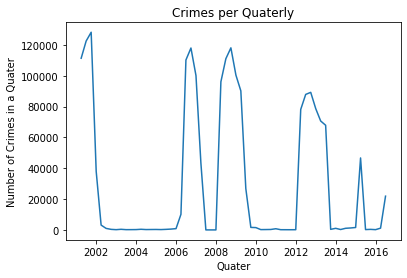

In [37]:
plt.plot(df.resample('Q').size())
plt.title('Crimes per Quaterly')
plt.xlabel('Quater')
plt.ylabel('Number of Crimes in a Quater')

In [38]:
df_1 =df.resample('M').size().reset_index()

In [39]:
df_1

,Date,0
0,2001-01-31,37528
1,2001-02-28,33560
2,2001-03-31,40295
3,2001-04-30,39769
4,2001-05-31,41490
...,...,...
180,2016-01-31,809
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [40]:
df_1.columns =['Date','Total Crimes']

In [41]:
df_1

,Date,Total Crimes
0,2001-01-31,37528
1,2001-02-28,33560
2,2001-03-31,40295
3,2001-04-30,39769
4,2001-05-31,41490
...,...,...
180,2016-01-31,809
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [42]:
df_2 =df_1.rename(columns ={'Date':'ds','Total Crimes':'y' })

In [43]:
df_2['ds']

0     2001-01-31
1     2001-02-28
2     2001-03-31
3     2001-04-30
4     2001-05-31
         ...    
180   2016-01-31
181   2016-02-29
182   2016-03-31
183   2016-04-30
184   2016-05-31
Name: ds, Length: 185, dtype: datetime64[ns]

In [44]:
df_2['y']

0      37528
1      33560
2      40295
3      39769
4      41490
       ...  
180      809
181      123
182      213
183     1663
184    20232
Name: y, Length: 185, dtype: int64

In [45]:
df_2.head()

,ds,y
0,2001-01-31,37528
1,2001-02-28,33560
2,2001-03-31,40295
3,2001-04-30,39769
4,2001-05-31,41490


In [46]:
 m = Prophet()

In [47]:
m.fit(df_2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future =m.make_future_dataframe(periods =356)

In [49]:
forcast =m.predict(future)

In [50]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,12235.287027,-4656.742611,34342.937293,12235.287027,12235.287027,2198.560482,2198.560482,2198.560482,2198.560482,2198.560482,2198.560482,0.0,0.0,0.0,14433.847509
1,2001-02-28,12213.022977,-8499.450222,30071.181758,12213.022977,12213.022977,174.352800,174.352800,174.352800,174.352800,174.352800,174.352800,0.0,0.0,0.0,12387.375777
2,2001-03-31,12188.373494,-4946.416983,32229.077178,12188.373494,12188.373494,968.062614,968.062614,968.062614,968.062614,968.062614,968.062614,0.0,0.0,0.0,13156.436108
3,2001-04-30,12164.519155,-3379.571576,32430.087899,12164.519155,12164.519155,1562.200336,1562.200336,1562.200336,1562.200336,1562.200336,1562.200336,0.0,0.0,0.0,13726.719491
4,2001-05-31,12139.869671,-5264.008507,33443.392778,12139.869671,12139.869671,2089.668406,2089.668406,2089.668406,2089.668406,2089.668406,2089.668406,0.0,0.0,0.0,14229.538077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2017-05-18,7503.370860,-8167.542811,30213.412897,7503.370751,7503.370985,3051.193224,3051.193224,3051.193224,3051.193224,3051.193224,3051.193224,0.0,0.0,0.0,10554.564085
537,2017-05-19,7502.575711,-7687.476421,29178.933012,7502.575601,7502.575836,2961.544024,2961.544024,2961.544024,2961.544024,2961.544024,2961.544024,0.0,0.0,0.0,10464.119734
538,2017-05-20,7501.780561,-7993.763008,29513.100518,7501.780451,7501.780687,2859.719815,2859.719815,2859.719815,2859.719815,2859.719815,2859.719815,0.0,0.0,0.0,10361.500376
539,2017-05-21,7500.985411,-9203.332385,28824.882725,7500.985301,7500.985538,2749.876070,2749.876070,2749.876070,2749.876070,2749.876070,2749.876070,0.0,0.0,0.0,10250.861481


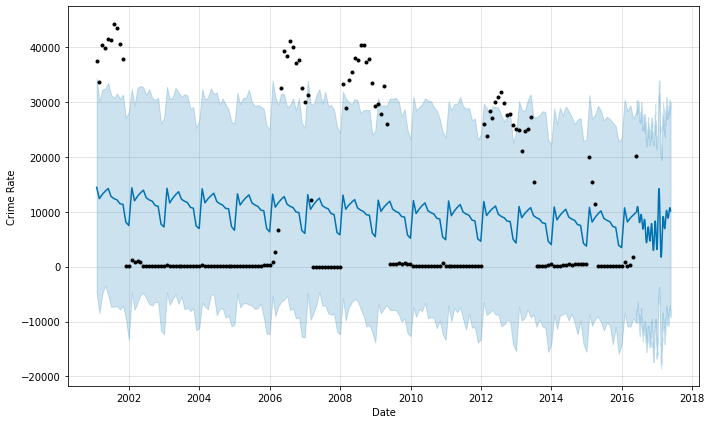

In [51]:
figure=m.plot(forcast, xlabel='Date', ylabel='Crime Rate')

False

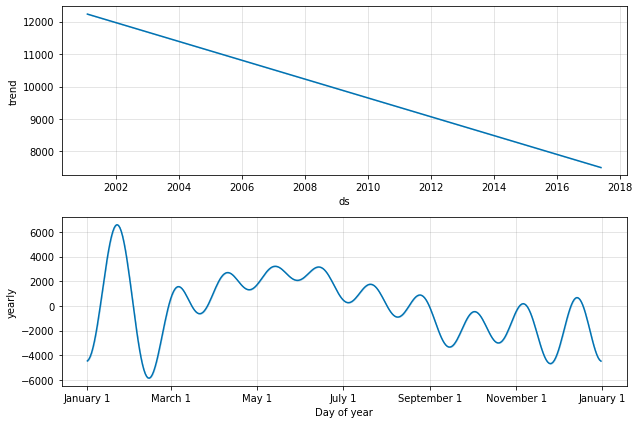

In [52]:
figure ==m.plot_components(forcast)